🎯 ЗАПУСК ТЕСТОВОГО СЦЕНАРИЯ

📋 1. СОЗДАНИЕ ТЕСТОВЫХ ДАННЫХ...
   Создано 3000 клиентов
   Столбцы: ['age', 'income', 'spending_score', 'credit_score', 'region', 'tenure_months']

   Статистика по данным:
               age         income  spending_score  credit_score
count  3000.000000    3000.000000     3000.000000   3000.000000
mean     45.125667   49436.730333       49.950028    646.878833
std      14.206659   19715.849414       20.967571     97.238666
min      18.000000   10000.000000      -31.767306    305.000000
25%      35.000000   35748.250000       35.765319    581.500000
50%      45.000000   49553.500000       49.932186    647.500000
75%      55.000000   62773.000000       64.305798    713.000000
max      80.000000  114861.000000      122.911304    863.500000

🎯 2. ФОРМИРОВАНИЕ ЦЕЛЕВОЙ ГРУППЫ...
   Выбрано 400 клиентов с высоким spending_score
   Пример ID целевой группы: [1218, 1796, 2239, 2625, 2641]...

🔍 3. ПОДБОР КОНТРОЛЬНОЙ ГРУППЫ МЕТОДОМ KNN...
🔍 НАЧИНАЕМ ПРОЦЕСС MATCH

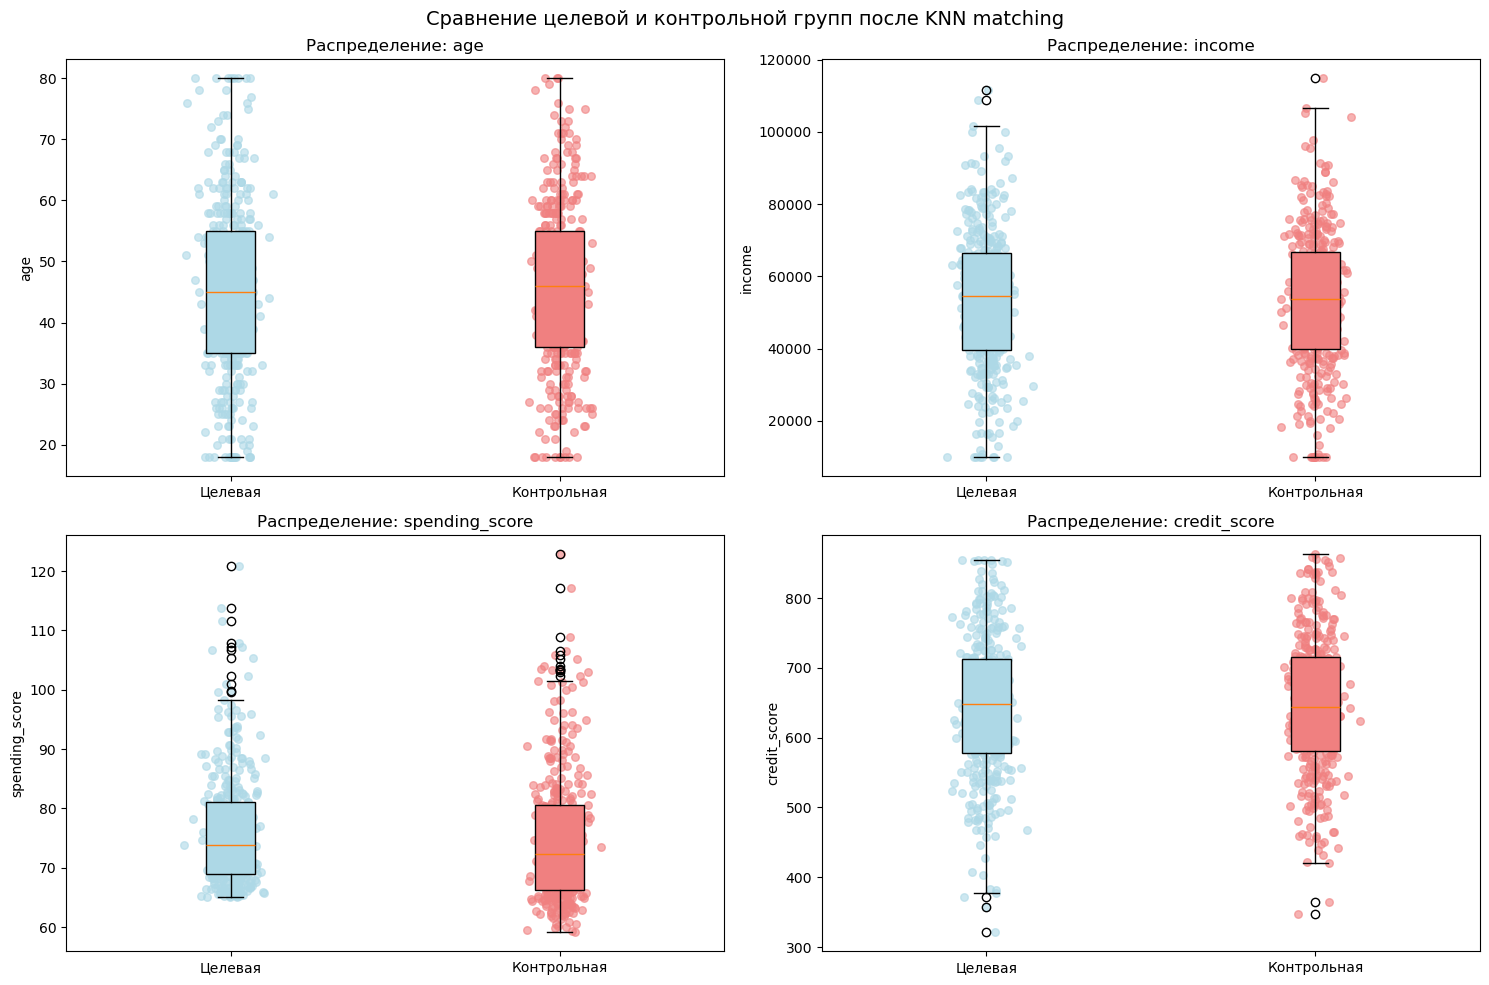


🎉 7. ФИНАЛЬНЫЙ ОТЧЕТ
Целевая группа:  369 клиентов
Контрольная группа: 369 клиентов
Всего в анализе:   738 клиентов
Среднее расстояние между парами: 0.657

💾 Результаты сохранены в переменной 'final_results'
   Размер финального датафрейма: (738, 8)

📋 ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Общий размер исходного датафрейма: (3000, 6)
Колонки: ['age', 'income', 'spending_score', 'credit_score', 'region', 'tenure_months']

Первые 3 строк целевой группы:
           age  income  spending_score  credit_score  pair_id
client_id                                                    
867         49   56390       73.173970         684.0        0
663         44   57466       68.778168         614.5        1
1949        61   42286       67.973667         582.0        2

Первые 3 строк контрольной группы:
           age  income  spending_score  credit_score  pair_id
client_id                                                    
2634        49   55969       74.123543         688.0        0
1267        4

'\nОСНОВНЫЕ ПРИНЦИПЫ РАБОТЫ АЛГОРИТМА:\n\n1. ГАРАНТИЯ УНИКАЛЬНОСТИ:\n   - Используется множество used_control_candidates для отслеживания использованных кандидатов\n   - Каждый кандидат может быть использован только один раз\n   - Жадный алгоритм гарантирует оптимальное распределение\n\n2. КАЧЕСТВО MATCHING:\n   - Сортировка пар по расстоянию обеспечивает лучшие匹配 сначала\n   - StandardScaler гарантирует равный вклад всех признаков\n   - SMD метрика объективно оценивает качество подбора\n\n3. ПРОВЕРКИ КАЧЕСТВА:\n   - 5 различных проверок на дубликаты\n   - Визуализация для интуитивного понимания\n   - Статистические метрики для объективной оценки\n\nПРЕИМУЩЕСТВА ДАННОГО ПОДХОДА:\n- Полная автоматизация процесса\n- Гарантия отсутствия дубликатов\n- Объективная оценка качества\n- Прозрачность и воспроизводимость\n- Гибкость в выборе признаков и параметров\n'

In [107]:
# Импорт необходимых библиотек
import pandas as pd  # для работы с данными в табличном формате
import numpy as np   # для математических операций и работы с массивами
from sklearn.neighbors import NearestNeighbors  # алгоритм KNN для поиска ближайших соседей
from sklearn.preprocessing import StandardScaler  # для стандартизации данных
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для улучшенной визуализации

def create_test_dataframe(n_clients=300, random_state=42):
    """
    СОЗДАНИЕ ТЕСТОВОГО ДАТАФРЕЙМА С КЛИЕНТАМИ
    
    Параметры:
    - n_clients: количество клиентов для генерации
    - random_state: фиксирует случайность для воспроизводимости результатов
    
    Возвращает:
    - DataFrame с искусственными данными клиентов
    """
    np.random.seed(random_state)  # фиксируем случайность
    
    # Создаем DataFrame с различными характеристиками клиентов
    df = pd.DataFrame({
        'client_id': range(1, n_clients + 1),  # уникальные ID клиентов
        'age': np.random.normal(45, 15, n_clients).astype(int),  # возраст ~N(45,15)
        'income': np.random.normal(50000, 20000, n_clients).astype(int),  # доход ~N(50000,20000)
        'spending_score': np.random.normal(50, 20, n_clients),  # склонность к тратам
        'credit_score': np.random.normal(650, 100, n_clients).astype(int),  # кредитный рейтинг
        'region': np.random.choice(['North', 'South', 'East', 'West'], n_clients),  # регион
        'tenure_months': np.random.exponential(24, n_clients).astype(int)  # время как клиент
    })
    
    # ОГРАНИЧИВАЕМ ЗНАЧЕНИЯ ДЛЯ РЕАЛИСТИЧНОСТИ
    df['age'] = df['age'].clip(18, 80)  # возраст от 18 до 80 лет
    df['income'] = df['income'].clip(10000, 150000)  # доход от 10к до 150к
    df['credit_score'] = df['credit_score'].clip(300, 850)  # кредитный рейтинг от 300 до 850
    df['tenure_months'] = df['tenure_months'].clip(1, 120)  # время клиента от 1 до 120 месяцев
    
    # ДОБАВЛЯЕМ ЗАВИСИМОСТИ МЕЖДУ ПРИЗНАКАМИ ДЛЯ РЕАЛИСТИЧНОСТИ
    # Чем выше доход, тем выше склонность к тратам
    df['spending_score'] = df['spending_score'] + (df['income'] - 50000) / 5000
    # Возраст немного влияет на кредитный рейтинг
    df['credit_score'] = df['credit_score'] + (df['age'] - 45) * 0.5
    
    # Устанавливаем client_id в качестве индекса для удобства
    df.set_index('client_id', inplace=True)
    
    return df

def create_control_group_without_duplicates(df, target_indices, features, n_neighbors=10):
    """
    ОСНОВНАЯ ФУНКЦИЯ: СОЗДАНИЕ КОНТРОЛЬНОЙ ГРУППЫ БЕЗ ДУБЛИКАТОВ
    
    Алгоритм:
    1. Разделяем данные на целевую группу и кандидатов
    2. Масштабируем признаки для корректной работы KNN
    3. Находим ближайших соседей для каждого целевого клиента
    4. С помощью жадного алгоритма создаем пары без дубликатов
    
    Параметры:
    - df: исходный DataFrame
    - target_indices: индексы клиентов целевой группы
    - features: список признаков для matching
    - n_neighbors: количество ближайших соседей для поиска
    
    Возвращает:
    - target_group: отобранная целевая группа
    - control_group: подобранная контрольная группа
    - matched_pairs: информация о созданных парах
    """
    
    print("🔍 НАЧИНАЕМ ПРОЦЕСС MATCHING...")
    
    # ШАГ 1: РАЗДЕЛЕНИЕ ДАННЫХ НА ГРУППЫ
    # Берем клиентов целевой группы по их индексам
    target_group = df.loc[target_indices].copy()
    # Все остальные клиенты - кандидаты в контрольную группу
    candidate_pool = df.drop(target_indices).copy()
    
    print(f"📊 Исходные данные:")
    print(f"   - Целевая группа: {len(target_group)} клиентов")
    print(f"   - Кандидатов для контрольной: {len(candidate_pool)} клиентов")
    print(f"   - Признаки для matching: {features}")
    
    # ШАГ 2: МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
    # KNN чувствителен к масштабу признаков, поэтому стандартизируем
    scaler = StandardScaler()
    # Преобразуем признаки целевой группы (fit_transform - учится на данных и преобразует)
    target_scaled = scaler.fit_transform(target_group[features])
    # Преобразуем признаки кандидатов (transform - использует параметры от целевой группы)
    candidates_scaled = scaler.transform(candidate_pool[features])
    
    # ШАГ 3: ПОИСК БЛИЖАЙШИХ СОСЕДЕЙ С ПОМОЩЬЮ KNN
    # Создаем модель KNN для поиска соседей
    knn = NearestNeighbors(
        n_neighbors=min(n_neighbors, len(candidate_pool)),  # не больше чем кандидатов
        metric='euclidean'  # евклидово расстояние
    )
    # Обучаем модель на кандидатах
    knn.fit(candidates_scaled)
    
    # Находим N ближайших соседей для каждого целевого клиента
    # distances - матрица расстояний, candidate_indices_in_pool - индексы соседей
    distances, candidate_indices_in_pool = knn.kneighbors(target_scaled)
    
    # ШАГ 4: ЖАДНЫЙ АЛГОРИТМ MATCHING БЕЗ ДУБЛИКАТОВ
    matched_pairs = []  # список созданных пар
    used_control_candidates = set()  # множество использованных кандидатов (гарантия уникальности)
    assigned_targets = set()  # множество назначенных целевых клиентов
    
    # СОЗДАЕМ ВСЕ ВОЗМОЖНЫЕ ПАРЫ (целевой клиент -> кандидат)
    all_pairs = []
    for i, target_idx in enumerate(target_group.index):  # для каждого целевого клиента
        for j in range(len(candidate_indices_in_pool[i])):  # для каждого его кандидата
            # Получаем индекс кандидата в пуле кандидатов
            candidate_pool_idx = candidate_indices_in_pool[i][j]
            # Преобразуем в глобальный индекс (оригинальный ID клиента)
            candidate_global_idx = candidate_pool.index[candidate_pool_idx]
            distance = distances[i][j]  # расстояние между парой
            
            # Сохраняем информацию о возможной паре
            all_pairs.append({
                'target_id': target_idx,
                'control_id': candidate_global_idx,
                'distance': distance,
                'target_index': i,
                'candidate_rank': j  # насколько близок кандидат (0 - самый близкий)
            })
    
    # СОРТИРУЕМ ПАРЫ ПО КАЧЕСТВУ (от лучших к худшим)
    # Лучшие пары - с наименьшим расстоянием
    all_pairs.sort(key=lambda x: x['distance'])
    
    # НАЗНАЧАЕМ ПАРЫ БЕЗ ДУБЛИКАТОВ
    for pair in all_pairs:
        # Проверяем: целевой клиент еще не назначен И кандидат еще не использован
        if (pair['target_id'] not in assigned_targets and 
            pair['control_id'] not in used_control_candidates):
            
            # Создаем пару
            matched_pairs.append({
                'pair_id': len(matched_pairs),  # уникальный ID пары
                'target_id': pair['target_id'],
                'control_id': pair['control_id'],
                'distance': pair['distance']
            })
            
            # Помечаем клиентов как использованных
            assigned_targets.add(pair['target_id'])
            used_control_candidates.add(pair['control_id'])
            
            # Если назначили всех целевых клиентов - завершаем
            if len(assigned_targets) == len(target_group):
                break
    
    # ШАГ 5: ФОРМИРУЕМ ФИНАЛЬНЫЕ ГРУППЫ
    # Получаем индексы клиентов для финальных групп
    final_target_indices = [p['target_id'] for p in matched_pairs]
    final_control_indices = [p['control_id'] for p in matched_pairs]
    m = 1
    # Создаем финальные группы
    #final_target_group = df.loc[final_target_indices].copy()
    final_control_group = df.loc[final_control_indices].copy()
    
    # ДОБАВЛЯЕМ СЛУЖЕБНУЮ ИНФОРМАЦИЮ
    # ID пары для связи целевого и контрольного клиента
    final_target_group['pair_id'] = [p['pair_id'] for p in matched_pairs]
    final_control_group['pair_id'] = [p['pair_id'] for p in matched_pairs]
    # Метка группы для удобства
    final_target_group['group'] = 'target'
    final_control_group['group'] = 'control'
    
    print(f"✅ Matching завершен:")
    print(f"   - Успешно создано пар: {len(matched_pairs)}")
    print(f"   - Не сматчено: {len(target_group) - len(matched_pairs)}")
    
    return final_target_group, final_control_group, matched_pairs

def comprehensive_duplicate_check(target_df, control_df, original_df):
    """
    ВСЕСТОРОННЯЯ ПРОВЕРКА НА ДУБЛИКАТЫ
    
    Проверяет:
    1. Нет клиентов в обеих группах одновременно
    2. Нет дубликатов внутри целевой группы
    3. Нет дубликатов внутри контрольной группы
    4. Все ID уникальны
    5. Группы одинакового размера
    
    Возвращает:
    - True если все проверки пройдены, иначе False
    """
    print("\n" + "🔎 ПРОВЕРКА НА ДУБЛИКАТЫ")
    print("=" * 50)
    
    # Получаем множества ID для быстрых операций
    target_ids = set(target_df.index)
    control_ids = set(control_df.index)
    all_original_ids = set(original_df.index)
    
    checks_passed = 0
    total_checks = 5
    
    # ПРОВЕРКА 1: ПЕРЕСЕЧЕНИЕ МЕЖДУ ГРУППАМИ
    # Находим клиентов, которые есть в обеих группах
    intersection = target_ids & control_ids
    if len(intersection) == 0:
        print("✅ 1. Нет клиентов в обеих группах")
        checks_passed += 1
    else:
        print(f"❌ 1. Обнаружены клиенты в обеих группах: {len(intersection)}")
        print(f"   ID: {sorted(intersection)}")
    
    # ПРОВЕРКА 2: ДУБЛИКАТЫ ВНУТРИ ЦЕЛЕВОЙ ГРУППЫ
    # Ищем повторяющиеся индексы в целевой группе
    target_duplicates = target_df.index[target_df.index.duplicated()]
    if len(target_duplicates) == 0:
        print("✅ 2. Нет дубликатов внутри целевой группы")
        checks_passed += 1
    else:
        print(f"❌ 2. Дубликаты в целевой группе: {len(target_duplicates)}")
    
    # ПРОВЕРКА 3: ДУБЛИКАТЫ ВНУТРИ КОНТРОЛЬНОЙ ГРУППЫ
    # Ищем повторяющиеся индексы в контрольной группе
    control_duplicates = control_df.index[control_df.index.duplicated()]
    if len(control_duplicates) == 0:
        print("✅ 3. Нет дубликатов внутри контрольной группы")
        checks_passed += 1
    else:
        print(f"❌ 3. Дубликаты в контрольной группе: {len(control_duplicates)}")
    
    # ПРОВЕРКА 4: УНИКАЛЬНОСТЬ ВСЕХ ID
    # Собираем все использованные ID
    all_used_ids = list(target_df.index) + list(control_df.index)
    unique_used_ids = set(all_used_ids)
    # Сравниваем количество использованных и уникальных ID
    if len(all_used_ids) == len(unique_used_ids):
        print("✅ 4. Все ID уникальны")
        checks_passed += 1
    else:
        print(f"❌ 4. Потеря уникальности: {len(all_used_ids)} использовано, {len(unique_used_ids)} уникальных")
    
    # ПРОВЕРКА 5: РАЗМЕРЫ ГРУПП
    # Целевая и контрольная группы должны быть одинакового размера
    if len(target_df) == len(control_df):
        print("✅ 5. Группы одинакового размера")
        checks_passed += 1
    else:
        print(f"❌ 5. Разные размеры групп: target={len(target_df)}, control={len(control_df)}")
    
    print(f"\n📋 ИТОГ ПРОВЕРКИ: {checks_passed}/{total_checks} пройдено")
    
    if checks_passed == total_checks:
        print("🎉 ВСЕ ПРОВЕРКИ ПРОЙДЕНЫ! Дубликатов не обнаружено!")
        return True
    else:
        print("⚠️ Обнаружены проблемы с дубликатами!")
        return False

def evaluate_matching_quality(target_df, control_df, features):
    """
    ОЦЕНКА КАЧЕСТВА MATCHING МЕЖДУ ГРУППАМИ
    
    Использует Standardized Mean Difference (SMD) для оценки:
    - SMD < 0.1: отличное соответствие
    - SMD < 0.2: хорошее соответствие  
    - SMD >= 0.2: требуется улучшение
    
    Возвращает:
    - DataFrame с результатами оценки
    """
    print("\n📈 ОЦЕНКА КАЧЕСТВА MATCHING")
    print("=" * 50)
    
    results = []
    
    for feature in features:
        # Вычисляем средние значения по группам
        target_mean = target_df[feature].mean()
        control_mean = control_df[feature].mean()
        target_std = target_df[feature].std()  # стандартное отклонение целевой группы
        
        # Standardized Mean Difference (SMD)
        # Нормированная разница между средними
        smd = abs(target_mean - control_mean) / target_std if target_std > 0 else 0
        abs_diff = abs(target_mean - control_mean)  # абсолютная разница
        pct_diff = (abs_diff / target_mean * 100) if target_mean != 0 else 0  # разница в %
        
        # Сохраняем результаты
        results.append({
            'feature': feature,
            'target_mean': target_mean,
            'control_mean': control_mean,
            'abs_diff': abs_diff,
            'smd': smd,
            'pct_diff': pct_diff
        })
    
    # ВЫВОД РЕЗУЛЬТАТОВ В ВИДЕ ТАБЛИЦЫ
    print(f"{'Признак':<15} {'Целевая':<10} {'Контрольная':<12} {'SMD':<8} {'Разница':<10}")
    print("-" * 55)
    
    for r in results:
        # Определяем статус качества по SMD
        if r['smd'] < 0.1:
            status = "✓"  # отлично
        elif r['smd'] < 0.2:
            status = "⚠"  # хорошо
        else:
            status = "❌"  # плохо
            
        print(f"{r['feature']:<15} {r['target_mean']:<10.1f} {r['control_mean']:<12.1f} "
              f"{r['smd']:<8.3f} {r['pct_diff']:<9.1f}% {status}")
    
    # Вычисляем средний SMD по всем признакам
    avg_smd = np.mean([r['smd'] for r in results])
    print(f"\n📊 Средний SMD: {avg_smd:.3f}")
    print("   SMD < 0.1 - отлично, < 0.2 - хорошо, >= 0.2 - требуется улучшение")
    
    return pd.DataFrame(results)

def plot_comparison(target_df, control_df, features):
    """
    ВИЗУАЛЬНОЕ СРАВНЕНИЕ ГРУПП
    
    Создает boxplot'ы для визуальной оценки распределения признаков
    в целевой и контрольной группах
    """
    # Создаем сетку графиков 2x2
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for idx, feature in enumerate(features[:4]):  # берем первые 4 признака
        # Определяем позицию графика в сетке
        row, col = idx // 2, idx % 2
        
        # Данные для визуализации
        target_data = target_df[feature]
        control_data = control_df[feature]
        
        # СОЗДАЕМ BOXPLOT
        bp = axes[row, col].boxplot([target_data, control_data], 
                                   labels=['Целевая', 'Контрольная'],
                                   patch_artist=True)  # разрешаем заливку цветом
        
        # НАСТРАИВАЕМ ЦВЕТА
        colors = ['lightblue', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # ДОБАВЛЯЕМ ТОЧКИ ДЛЯ ЛУЧШЕЙ ВИЗУАЛИЗАЦИИ РАСПРЕДЕЛЕНИЯ
        for i, data in enumerate([target_data, control_data]):
            y = data  # значения признака
            # Добавляем небольшой случайный разброс по X для лучшей визуализации
            x = np.random.normal(i + 1, 0.04, size=len(y))
            axes[row, col].scatter(x, y, alpha=0.6, s=30, color=colors[i])
        
        # НАСТРОЙКИ ГРАФИКА
        axes[row, col].set_title(f'Распределение: {feature}')
        axes[row, col].set_ylabel(feature)
    
    # Общий заголовок
    plt.suptitle('Сравнение целевой и контрольной групп после KNN matching', fontsize=14)
    plt.tight_layout()
    plt.show()

# =============================================================================
# 🚀 ОСНОВНАЯ ПРОГРАММА - ПОСЛЕДОВАТЕЛЬНОСТЬ ВЫПОЛНЕНИЯ
# =============================================================================

if __name__ == "__main__":
    print("🎯 ЗАПУСК ТЕСТОВОГО СЦЕНАРИЯ")
    print("=" * 60)
    
    # ЭТАП 1: СОЗДАНИЕ ТЕСТОВЫХ ДАННЫХ
    print("\n📋 1. СОЗДАНИЕ ТЕСТОВЫХ ДАННЫХ...")
    df = create_test_dataframe(n_clients=3000)
    print(f"   Создано {len(df)} клиентов")
    print(f"   Столбцы: {list(df.columns)}")
    print("\n   Статистика по данным:")
    print(df[['age', 'income', 'spending_score', 'credit_score']].describe())
    
    # ЭТАП 2: ФОРМИРОВАНИЕ ЦЕЛЕВОЙ ГРУППЫ
    print("\n🎯 2. ФОРМИРОВАНИЕ ЦЕЛЕВОЙ ГРУППЫ...")
    # Выбираем клиентов с высоким spending_score (> 65)
    high_spenders = df[df['spending_score'] > 65].index.tolist()
    # Случайно выбираем 40 клиентов из этой группы
    target_indices = np.random.choice(high_spenders, size=400, replace=False)
    
    print(f"   Выбрано {len(target_indices)} клиентов с высоким spending_score")
    print(f"   Пример ID целевой группы: {sorted(target_indices[:5])}...")
    
    # ЭТАП 3: ПОДБОР КОНТРОЛЬНОЙ ГРУППЫ
    print("\n🔍 3. ПОДБОР КОНТРОЛЬНОЙ ГРУППЫ МЕТОДОМ KNN...")
    # Признаки, по которым будем искать похожих клиентов
    features = ['age', 'income', 'spending_score', 'credit_score']
    
    # ВЫЗОВ ОСНОВНОЙ ФУНКЦИИ
    target_group, control_group, pairs = create_control_group_without_duplicates(
        df=df,
        target_indices=target_indices,
        features=features,
        n_neighbors=35  # ищем среди 15 ближайших соседей
    )
    
    # ЭТАП 4: ПРОВЕРКА НА ДУБЛИКАТЫ
    print("\n🔎 4. ПРОВЕРКА НА ДУБЛИКАТЫ...")
    duplicate_check_passed = comprehensive_duplicate_check(target_group, control_group, df)
    
    # ЭТАП 5-7: ЕСЛИ ПРОВЕРКА ПРОЙДЕНА
    if duplicate_check_passed:
        print("\n📊 5. АНАЛИЗ КАЧЕСТВА MATCHING...")
        quality_report = evaluate_matching_quality(target_group, control_group, features)
        
        print("\n📈 6. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...")
        plot_comparison(target_group, control_group, features)
        
        # ЭТАП 7: ФИНАЛЬНЫЙ ОТЧЕТ
        print("\n🎉 7. ФИНАЛЬНЫЙ ОТЧЕТ")
        print("=" * 40)
        print(f"Целевая группа:  {len(target_group)} клиентов")
        print(f"Контрольная группа: {len(control_group)} клиентов")
        print(f"Всего в анализе:   {len(target_group) + len(control_group)} клиентов")
        print(f"Среднее расстояние между парами: {np.mean([p['distance'] for p in pairs]):.3f}")
        
        # СОХРАНЯЕМ РЕЗУЛЬТАТЫ
        final_results = pd.concat([target_group, control_group])
        print(f"\n💾 Результаты сохранены в переменной 'final_results'")
        print(f"   Размер финального датафрейма: {final_results.shape}")
        
        # ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ
        print("\n📋 ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
        print(f"Общий размер исходного датафрейма: {df.shape}")
        print(f"Колонки: {list(df.columns)}")
        print("\nПервые 3 строк целевой группы:")
        print(target_group[['age', 'income', 'spending_score', 'credit_score', 'pair_id']].head(3))
        print("\nПервые 3 строк контрольной группы:")
        print(control_group[['age', 'income', 'spending_score', 'credit_score', 'pair_id']].head(3))
        
    else:
        print("\n❌ Обнаружены проблемы с дубликатами! Анализ прерван.")
    
    print("\n" + "=" * 60)
    print("ТЕСТОВЫЙ СЦЕНАРИЙ ЗАВЕРШЕН")

# =============================================================================
# 💡 ПОЯСНЕНИЕ КЛЮЧЕВЫХ МОМЕНТОВ АЛГОРИТМА
# =============================================================================

"""
ОСНОВНЫЕ ПРИНЦИПЫ РАБОТЫ АЛГОРИТМА:

1. ГАРАНТИЯ УНИКАЛЬНОСТИ:
   - Используется множество used_control_candidates для отслеживания использованных кандидатов
   - Каждый кандидат может быть использован только один раз
   - Жадный алгоритм гарантирует оптимальное распределение

2. КАЧЕСТВО MATCHING:
   - Сортировка пар по расстоянию обеспечивает лучшие匹配 сначала
   - StandardScaler гарантирует равный вклад всех признаков
   - SMD метрика объективно оценивает качество подбора

3. ПРОВЕРКИ КАЧЕСТВА:
   - 5 различных проверок на дубликаты
   - Визуализация для интуитивного понимания
   - Статистические метрики для объективной оценки

ПРЕИМУЩЕСТВА ДАННОГО ПОДХОДА:
- Полная автоматизация процесса
- Гарантия отсутствия дубликатов
- Объективная оценка качества
- Прозрачность и воспроизводимость
- Гибкость в выборе признаков и параметров
"""

In [105]:
control_group.shape

(356, 8)

In [99]:
dic = {0.6: -1, 0.8: 1, 0.3: -1, 0.55: -1, 0.1: -1, 0.96: 1, 0.33: 1, 0.2: -1, 0.14: -1, 0.88: 1}
for i in sorted(dic, reverse=True):
    print(i, dic[i])

0.96 1
0.88 1
0.8 1
0.6 -1
0.55 -1
0.33 1
0.3 -1
0.2 -1
0.14 -1
0.1 -1
